In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/인공지능개론/car_evaluation.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
c

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1723,False
1724,False
1725,False
1726,False


In [ ]:
df.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
vhigh   vhigh  5more  4        big       low     unacc    1
                                         high    unacc    1
                      2        small     med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
                                                         ..
high    high   2      2        med       low     unacc    1
                                         high    unacc    1
                               big       med     unacc    1
                                         low     unacc    1
                                         high    unacc    1
Name: count, Length: 1728, dtype: int64

In [ ]:
 label_encoder = LabelEncoder()
 for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [ ]:
df['class'].value_counts()

,count
class,
2,1210
0,384
1,69
3,65


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X.shape

(1728, 6)

In [ ]:
y.shape

(1728,)

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [ ]:
y

,class
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[ 1.35185249,  1.34948141,  1.34190571,  1.22503522, -1.22474807,
        -1.23299669],
       [ 0.4506175 ,  1.34948141, -0.44385615, -0.00803009,  1.22120833,
         1.22765519],
       [-0.4506175 , -0.43433811,  1.34190571, -1.24109541, -1.22474807,
        -1.23299669],
       [-1.35185249,  0.45757165,  0.44902478, -1.24109541, -0.00176987,
         1.22765519],
       [-1.35185249,  0.45757165, -0.44385615, -1.24109541, -0.00176987,
        -0.00267075]])

In [ ]:
#
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
confusion_matrix(y_test, dt_pred)


Decision Tree Accuracy: 0.9739884393063584


array([[ 76,   6,   1,   0],
       [  1,  10,   0,   0],
       [  0,   0, 235,   0],
       [  1,   0,   0,  16]])

Text(95.72222222222221, 0.5, 'Actual')

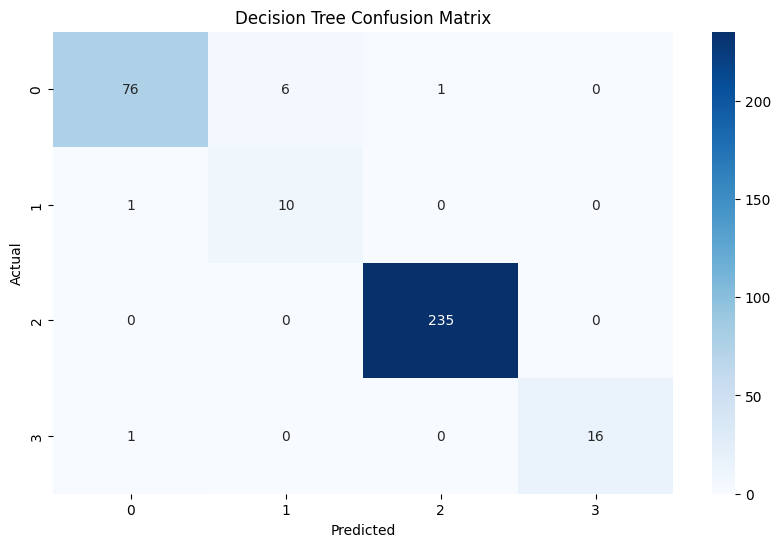

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9797687861271677


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.9421965317919075


In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.6589595375722543


In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Accuracy:", svm_accuracy)
confusion_matrix(y_test, svm_pred)

Support Vector Machine Accuracy: 0.9017341040462428


array([[ 68,   5,  10,   0],
       [  6,   4,   0,   1],
       [ 10,   0, 225,   0],
       [  2,   0,   0,  15]])

Text(95.72222222222221, 0.5, 'Actual')

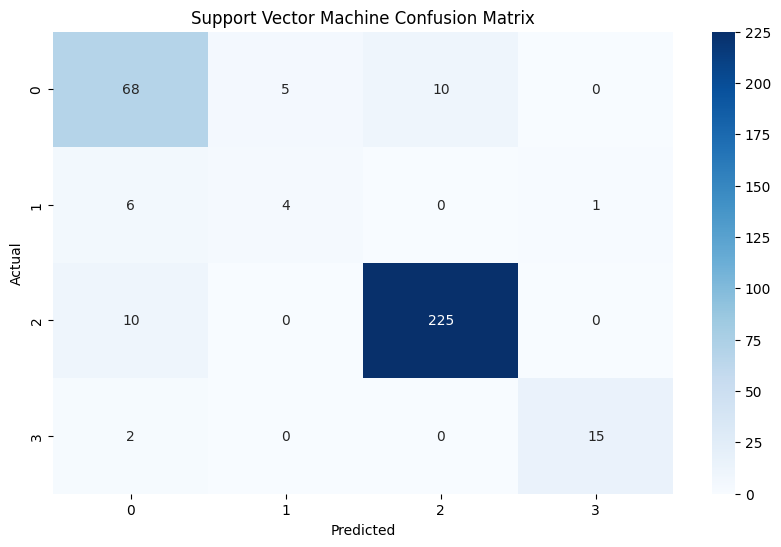

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')